In [14]:
# Import Libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
%matplotlib inline 

In [5]:
# importing our dataset
df = pd.read_csv("/content/heart1.csv")
# reading the file
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# Checking missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#check for Correlation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


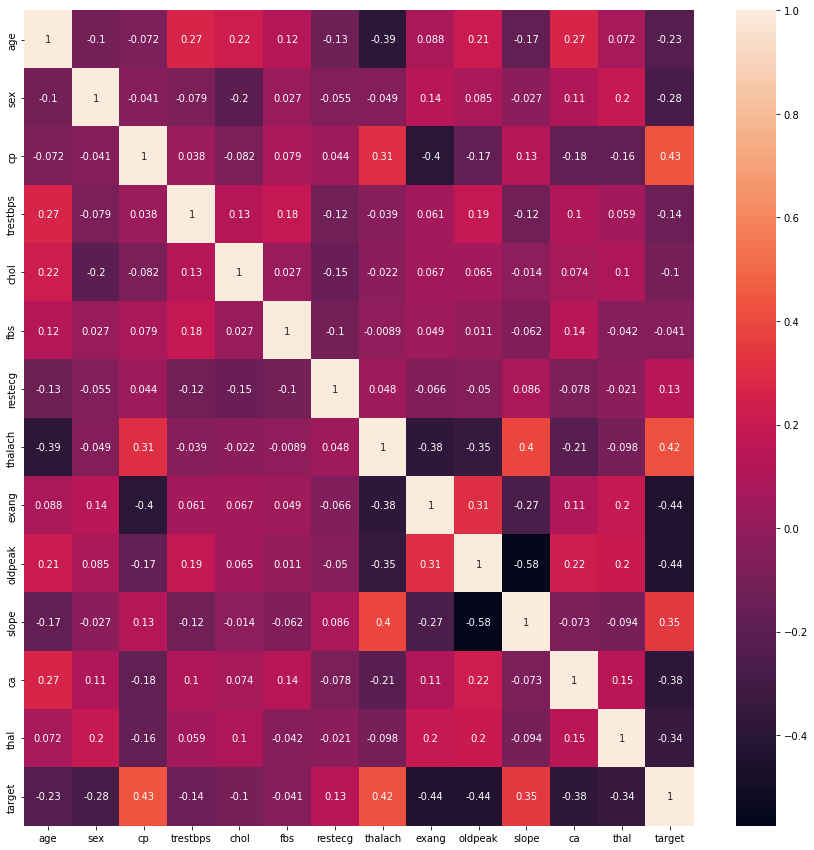

In [10]:
# creating heatmap
cor = df.corr()

plt.figure(figsize = (15,15))
sns.heatmap(cor, annot = True)

In [12]:
#drop features with low correlation
dataset = df.drop(['chol','fbs','restecg','trestbps','age','sex','thal'], axis=1)
dataset.head(5)

,cp,thalach,exang,oldpeak,slope,ca,target
0,0,168,0,1.0,2,2,0
1,0,155,1,3.1,0,0,0
2,0,125,1,2.6,0,0,0
3,0,161,0,0.0,2,1,0
4,0,106,0,1.9,1,3,0


In [13]:
# Separting the data(input and Outcome)
X = dataset.drop(['target'], axis = 1)
y = dataset['target']

In [16]:
# Data Standardization
scaler = StandardScaler()

In [17]:
# Fitting the data
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[-0.91575542  0.82132052 -0.71228712 -0.06088839  0.99543334  1.20922066]
 [-0.91575542  0.2559679   1.40392824  1.72713707 -2.24367514 -0.73197147]
 [-0.91575542 -1.04869198  1.40392824  1.30141672 -2.24367514 -0.73197147]
 ...
 [-0.91575542 -1.35311262  1.40392824 -0.06088839 -0.6241209   0.23862459]
 [-0.91575542  0.42992256 -0.71228712 -0.91232909  0.99543334 -0.73197147]
 [-0.91575542 -1.57055593 -0.71228712  0.27968789 -0.6241209   0.23862459]]


In [18]:
X = standardized_data

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
# Create RandomForest Classifier object
model = RandomForestClassifier(n_estimators=20)
# Train RandomForest Classifier
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)
print(f"Accuracy of model is {round(metrics.accuracy_score(y_test, y_pred)*100, 2)}%")

Accuracy of model is 97.08%


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[158,   3],
       [  6, 141]])

In [22]:
from sklearn.model_selection import learning_curve
train_score = model.score(X,y)

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
le = LabelEncoder() # Label encoding the target
sc = StandardScaler() # Scaling the input features
y = le.fit_transform(y)#Label Encoding the target
# Pipeline with scaling and classification as steps, must use a pipelne since we are using KFoldCV
lr = Pipeline(steps=(['scaler',sc],
                        ['classifier',model]))

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
cv = StratifiedKFold(n_splits=5,random_state=11,shuffle=True) # Creating a StratifiedKFold object with 5 folds
cv_scores = cross_val_score(lr,X,y,scoring="accuracy",cv=cv) # Storing the CV scores (accuracy) of each fold
train_size,train_scores,test_scores = learning_curve(estimator=lr,X=X,y=y,cv=cv,scoring="accuracy",random_state=11)
train_scores = 1-np.mean(train_scores,axis=1)#converting the accuracy score to misclassification rate
test_scores = 1-np.mean(test_scores,axis=1)#converting the accuracy score to misclassification rate
lc = pd.DataFrame({"Training_size":train_size,"Training_loss":train_scores,"Validation_loss":test_scores}).melt(id_vars="Training_size")

In [25]:
print(f'Cross Validation Accuracies:\n{"-"*25}\n{list(cv_scores)}\n\n\
Mean Cross Validation Accuracy:\n{"-"*25}\n{np.mean(cv_scores)}\n\n\
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(cv_scores)}\n\n\
Training Accuracy:\n{"-"*15}\n{train_score}\n\n')

Cross Validation Accuracies:
-------------------------
[0.9853658536585366, 1.0, 0.9853658536585366, 0.9853658536585366, 1.0]

Mean Cross Validation Accuracy:
-------------------------
0.9912195121951219

Standard Deviation of Cross Validation Accuracy:
-------------------------
0.007169238271560527

Training Accuracy:
---------------
0.9902439024390244




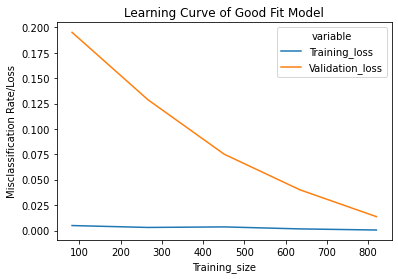

In [26]:
sns.lineplot(data=lc,x="Training_size",y="value",hue="variable")
plt.title("Learning Curve of Good Fit Model")
plt.ylabel("Misclassification Rate/Loss");

In [28]:
#exporting the model
import pickle
pickle.dump(model, open('heartdisease.pkl', 'wb'))